<a href="https://colab.research.google.com/github/ashish-ty/Image_Restoration/blob/main/Project_denoise_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import cv2
import glob
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [14]:
! pip install kaggle

In [15]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
! cp kaggle.json ~/.kaggle/

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets download -d jessicali9530/lfw-dataset

 90% 101M/112M [00:01<00:00, 84.9MB/s] 
100% 112M/112M [00:01<00:00, 105MB/s] 


In [19]:
! unzip lfw-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Si

In [20]:
face_images = glob.glob('/content/lfw-deepfunneled/lfw-deepfunneled/**/*.jpg') 

In [21]:
import pickle

images = np.zeros((len(face_images),120,120,3))

for i in range(len(face_images)):
  img = tf.keras.preprocessing.image.load_img(face_images[i], target_size=(120,120,3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  images[i] = img

In [22]:
images = images/255.0

In [23]:
images

array([[[[0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.        , 0.00392157, 0.        ],
         [0.        , 0.00392157, 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.01568627],
         [0.        , 0.        , 0.00784314]],

        ...,

        [[0.14509804, 0.15294118, 0.13333333],
         [0.15294118, 0.16078431, 0.14117647]

In [24]:
#Splitting
import random

random_nums = random.sample(range(0,1000),100)
x_test = np.zeros((100,120,120,3))
x_train = np.zeros((900,120,120,3))


tt=0
tr=0

for i in range(0,1000):
  if i not in random_nums:
    x_train[tt] = images[i]
    tt = tt + 1
  else:
    x_test[tr] = images[i]
    tr = tr + 1


In [25]:
noise_fact_val = 30/255

x_train_noise = x_train + noise_fact_val*np.random.normal(loc=0, scale=1.0,size=x_train.shape)
x_test_noise = x_test + noise_fact_val*np.random.normal(loc=0, scale=1.0,size=x_test.shape) 

In [26]:
x_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [27]:
x_train_noise[0]

array([[[ 0.04596356,  0.12919693, -0.02642854],
        [ 0.08512945,  0.03744782,  0.0496608 ],
        [-0.01159706,  0.00988893, -0.11038065],
        ...,
        [-0.20086314, -0.02194185, -0.05198115],
        [-0.02818419, -0.23092813,  0.0381979 ],
        [ 0.01288541,  0.13135536, -0.0185155 ]],

       [[ 0.2672762 , -0.01445099, -0.19855717],
        [-0.16380957, -0.05270604, -0.01624987],
        [ 0.12967285,  0.08773536,  0.14883849],
        ...,
        [ 0.12456235,  0.05349593,  0.00553313],
        [-0.03859298,  0.11456387, -0.01783354],
        [ 0.08925729, -0.13890513,  0.12806784]],

       [[-0.01245033, -0.0998177 , -0.00462409],
        [ 0.06410259,  0.13184555, -0.09923716],
        [-0.2758235 , -0.1844573 ,  0.05356812],
        ...,
        [-0.08370835,  0.11255954,  0.07260917],
        [ 0.06732307,  0.01479764, -0.04463543],
        [ 0.05161421, -0.17577328,  0.10736138]],

       ...,

       [[ 0.1715367 ,  0.22561669, -0.38693206],
        [-0

In [28]:
images

array([[[[0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.        , 0.00392157, 0.        ],
         [0.        , 0.00392157, 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.01568627],
         [0.        , 0.        , 0.00784314]],

        ...,

        [[0.14509804, 0.15294118, 0.13333333],
         [0.15294118, 0.16078431, 0.14117647]

In [116]:
model = models.Sequential()

model.add(layers.Conv2D(128, (9, 9), strides = 1, padding = 'same', activation='relu',input_shape=(120,120,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (7, 7), strides = 1, padding = 'same',activation='relu'))
model.add(layers.UpSampling2D())

model.add(layers.Conv2D(32, (5, 5), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(3, (5, 5), strides = 1, padding = 'same',activation='relu'))




model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 120, 120, 128)     31232     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 60, 60, 64)        401472    
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 120, 120, 32)      51232     
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 120, 120, 3)       2403      
Total params: 486,339
Trainable params: 486,339
Non-trainable params: 0
_______________________________________________

In [126]:
model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    model.fit(x_train_noise.reshape(-1, 120, 120, 3), x_train.reshape(-1, 120, 120, 3), epochs = 500, batch_size = 128, 
              validation_data = (x_test_noise.reshape(-1, 120, 120, 3), x_test.reshape(-1, 120, 120, 3)))

Epoch 1/500
8/8 [==============================] - 6s 649ms/step - loss: 0.1027 - accuracy: 0.6430 - val_loss: 0.0769 - val_accuracy: 0.6604
Epoch 2/500
8/8 [==============================] - 5s 622ms/step - loss: 0.0750 - accuracy: 0.6984 - val_loss: 0.0746 - val_accuracy: 0.6384
Epoch 3/500
8/8 [==============================] - 5s 619ms/step - loss: 0.0731 - accuracy: 0.6864 - val_loss: 0.0736 - val_accuracy: 0.6492
Epoch 4/500
8/8 [==============================] - 5s 621ms/step - loss: 0.0717 - accuracy: 0.7013 - val_loss: 0.0721 - val_accuracy: 0.7077
Epoch 5/500
8/8 [==============================] - 5s 622ms/step - loss: 0.0703 - accuracy: 0.7512 - val_loss: 0.0713 - val_accuracy: 0.7405
Epoch 6/500
8/8 [==============================] - 5s 623ms/step - loss: 0.0696 - accuracy: 0.7709 - val_loss: 0.0708 - val_accuracy: 0.7605
Epoch 7/500
8/8 [==============================] - 5s 622ms/step - loss: 0.0692 - accuracy: 0.7864 - val_loss: 0.0706 - val_accuracy: 0.7659
Epoch 8/500
8

In [31]:

#utility function to pick samples to be tested
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [127]:
num = 10
org, temp = get_samples(x_train, num)
noise = x_train_noise[temp]
preds = model.predict(noise)

Original Images


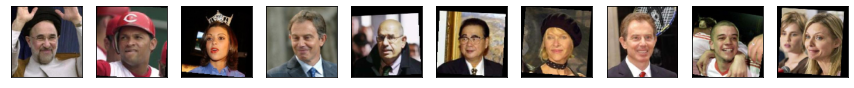

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images with noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


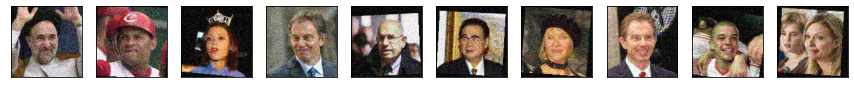

Predicted Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


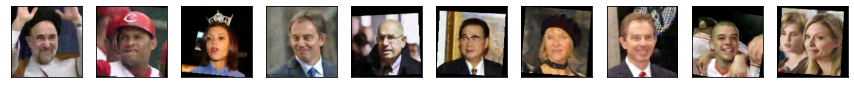

In [128]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Images with noise')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noise[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


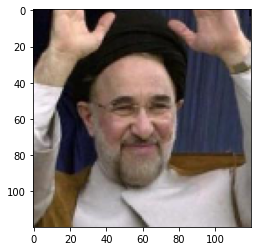

In [140]:
plt.imshow(x_train[temp[0]], cmap=plt.cm.binary)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


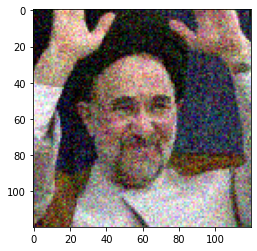

In [141]:
plt.imshow(x_train_noise[temp[0]], cmap=plt.cm.binary)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


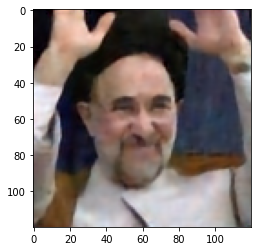

In [135]:
plt.imshow(preds[0], cmap=plt.cm.binary)